# Assignment 2

Step 1:
Import the boston house dataset from sklearn.datasets.
from sklearn.datasets import load_boston

boston = load_boston()

Create train and test datasets.

Check the data description and familiarize yourself with the data.

Step 2: Create a scatter plot of each attribute with the mean house price.

Step 3: Create a box plot of all attributes. 

Step 4: Use StandardScaler() to scale the training data set.

Step 5: Use KNeighborsRegressor() to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

Step 6: Repeat Step 5 for RandomForestRegressor. Use

RandomForestRegressor(n_estimators=100, random_state=0)

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [209]:
boston = load_boston()

/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [210]:
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [211]:
(X_train, X_test, y_train, y_test) =\
    train_test_split(boston.data, boston.target, test_size=.25, stratify=None, shuffle=True)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((379, 13), (127, 13), (379,), (127,))

In [212]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [213]:
## step 2: Create a scatter plot of each attribute with the mean house price.

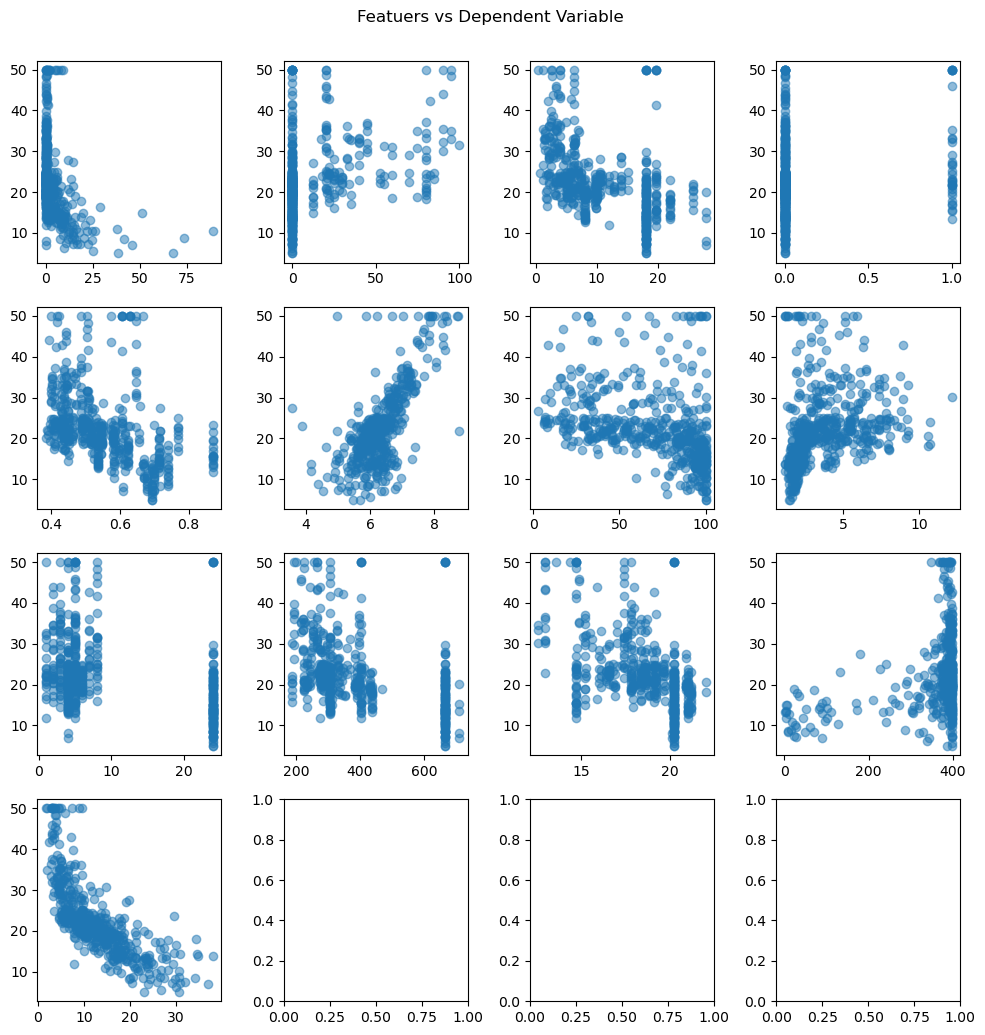

In [214]:
X = boston.data
y = boston.target

fig, ax = plt.subplots(4,4,figsize=(10,10))
plt.tight_layout()
plt.suptitle("Featuers vs Dependent Variable", y=1.03)


for index, item in enumerate(np.ravel(ax)):
    if ( index > 12):
        continue
    
    feature_name = boston.feature_names[index]
    feature_column = boston.data[:,index]
    target_column = boston.target
    
    item.plot(feature_column, target_column,'o', alpha=.5)

plt.show()   


## Create a box plot of all attributes. 

<AxesSubplot:>

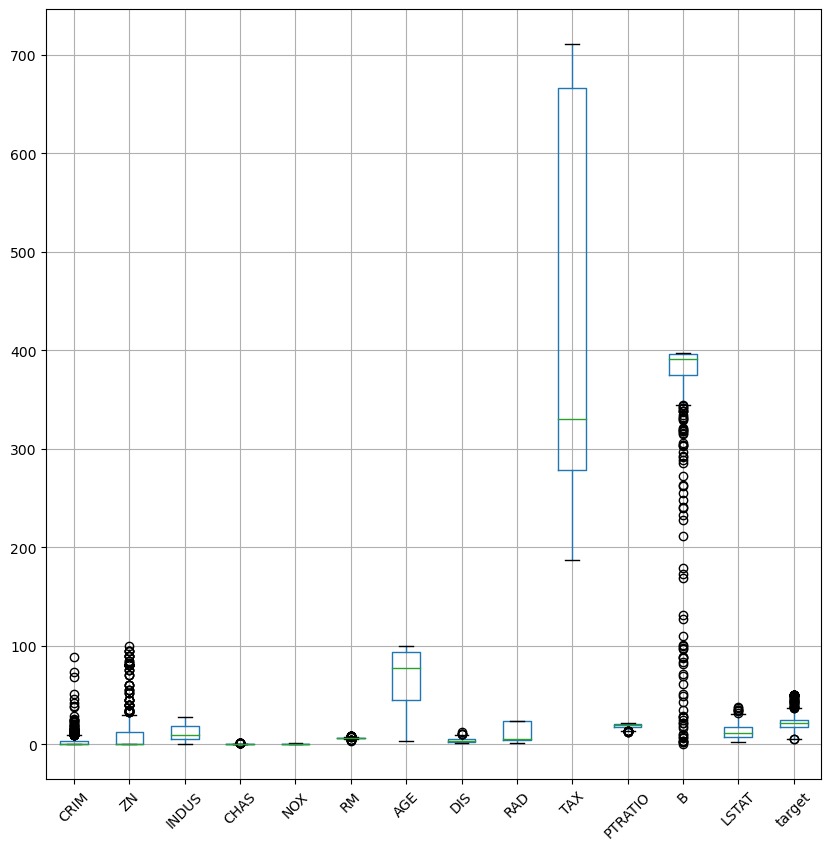

In [215]:
ax = df_boston.boxplot(figsize=(10,10), rot=45)
ax

## Use StandardScaler() to scale the training data set.

In [243]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
X_trained_scaled = standard_scalar.fit_transform(X_train,y_train)

## Use KNeighborsRegressor() to fit both not and scaled datasets. 

Check the scores of test dataset for both models.

KNeighborsRegressor  -- Get the value by interopolation
KNeighborsClassifier -- Get the value by vote.

In [245]:
from sklearn.neighbors import KNeighborsRegressor
k_neighbors_regressor = KNeighborsRegressor(n_neighbors=5)

In [246]:
k_non_scaled = k_neighbors_regressor_non_scaled.fit(X_train,y_train)
k_non_scaled.score(X_train,y_train)

0.7240600389104772

In [250]:
k_non_scaled.score(X_test,y_test)

0.3267231298549541

In [251]:
k_scaled = k_neighbors_regressor_scaled.fit(X_trained_scaled,y_train)
k_scaled.score(X_trained_scaled, y_train)

0.8447803148780296

In [255]:
X_test_scaled = standard_scalar.transform(X_test)
k_neighbors_regressor_scaled.score(X_test_scaled,y_test)

0.8002514486997929

## RandomForestRegressor repeat for previous step

combines the output of multiple decision trees to reach a single result. Its ease of 
use and flexibility have fueled its adoption, as it handles both classification and 
regression problems.

In [256]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()

In [258]:
non_scaled = random_forest_regressor.fit(X_test,y_test)
non_scaled.score(X_train,y_train)

0.8123083403881399

In [259]:
non_scaled.score(X_test,y_test)

0.9649946650339025

In [261]:
scaled = random_forest_regressor.fit(X_trained_scaled, y_train)
scaled.score(X_trained_scaled, y_train)

0.9785514074855236

In [263]:
X_test_scaled = standard_scalar.transform(X_test)
scaled.score(X_test_scaled, y_test)

0.9008216743966344